In [69]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import io
from math import atan

In [70]:
# Declare constants
A = 0.057
ao = -0.698
Cda = 0.69
Cdo = 0.18
Cla = 3.09
Cld = 0.13

g = 9.81
m = 0.175
P = 1.23
theta = 0

# Declare step size
h = 0.01

# Declare arrays
xplot = [[],[],[],[],[],[],[],[]]
yplot = [[],[],[],[],[],[],[],[]]
tplot = [[],[],[],[],[],[],[],[]]

In [71]:
# Declare initial conditions
for i in range (0,7):
    x = 0.0
    y = 1.0
    u = 0.0
    w = 0.0
    t = 0

    theta = (i*5)*(np.pi/180)
        
    up = np.sin(theta)*14
    wp = np.cos(theta)*14
    
    while (y > 0):

        # Add x,y and t values to respective arrays
        xplot[i].append(x)
        yplot[i].append(y)
        t += h
        tplot[i].append(t)

        # Euler Method: Assume y and x are approximately the previous value summed with the respective slope multiplied by change in time
        y = y + (h*up)
        x = x + (h*wp)

        # Update new velocity in the y values (u) and velocity in the x values (w)
        u = up + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.sin(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.sin(np.pi+ np.arctan(-up/wp)) - m * g )
        w = wp + h * ((A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cld + Cla * (theta + np.arctan(-up/wp))) * np.cos(np.pi/2 + np.arctan(-up/wp)) + (A*P/(2*m)) * ((wp)**2 + (up)**2) * (Cdo + Cda * ((theta + np.arctan(-up/wp) - ao)**2)) * np.cos(np.pi - np.arctan(-up/wp)))
        up = u
        wp = w

        print(str(x) + " " + str(y) + " " + str(t))

0.14 1.0 0.01
0.2779734310089184 1.0003387258 0.02
0.4139886813615056 1.0009773916536213 0.03
0.5481097769734637 1.0018812818989735 0.04
0.680396818021621 1.0030192822318404 0.05
0.8109063573565147 1.0043634708806983 0.060000000000000005
0.9396917299677712 1.0058887611836753 0.07
1.066803341133085 1.0075725884058453 0.08
1.192288919529087 1.0093946347399243 0.09
1.3161937404941364 1.0113365873496374 0.09999999999999999
1.4385608237531473 1.0133819250782434 0.10999999999999999
1.5594311091997095 1.0155157300831161 0.11999999999999998
1.6788436137473672 1.0177245211933275 0.12999999999999998
1.796835571783712 1.0199961062388865 0.13999999999999999
1.9134425613672867 1.0223194509822042 0.15
2.0286986179819047 1.0246845626062777 0.16
2.1426363373929367 1.027082385989637 0.17
2.255286968925153 1.0295047112331557 0.18000000000000002
2.366680500293546 1.0319440911048674 0.19000000000000003
2.4768457349606576 1.0343937672413195 0.20000000000000004
2.5858103628609164 1.0368476040921542 0.210000

13.240522638152147 5.645996528908934 2.1299999999999986
13.274240759221229 5.6534550625529425 2.1399999999999983
13.307842002941758 5.6608329212877 2.149999999999998
13.341326992464579 5.6681304271724064 2.159999999999998
13.374696341136284 5.675347897349991 2.1699999999999977
13.407950652629212 5.6824856440971185 2.1799999999999975
13.441090521068793 5.689543974873173 2.1899999999999973
13.474116531158291 5.696523192368253 2.199999999999997
13.507029258301005 5.70342359455019 2.209999999999997
13.539829268719961 5.7102454747105975 2.2199999999999966
13.57251711957516 5.716989121509969 2.2299999999999964
13.605093359078419 5.723654819021842 2.239999999999996
13.637558526605842 5.7302428467760365 2.249999999999996
13.66991315280799 5.736753479800979 2.259999999999996
13.70215775971776 5.743186988665135 2.2699999999999956
13.734292860856048 5.749543639517551 2.2799999999999954
13.766318961335209 5.75582369412752 2.289999999999995
13.798236557960369 5.762027409923395 2.299999999999995
13.

11.207534090871363 8.348000561643529 2.489999999999991
11.22944779583629 8.354209861779253 2.4999999999999907
11.25131040147536 8.36032947845138 2.5099999999999905
11.273121875763437 8.366359805516309 2.5199999999999902
11.294882180751186 8.372301228771283 2.52999999999999
11.316591272677803 8.37815412601034 2.53999999999999
11.338249102080203 8.383918867079565 2.5499999999999896
11.359855613898715 8.389595813931646 2.5599999999999894
11.381410747579345 8.39518532067971 2.569999999999989
11.402914437172647 8.400687733650454 2.579999999999989
11.424366611429264 8.406103391436531 2.5899999999999888
11.445767193892166 8.411432624948219 2.5999999999999885
11.467116102985672 8.416675757464333 2.6099999999999883
11.488413252101257 8.421833104682388 2.619999999999988
11.509658549680227 8.426904974767998 2.629999999999988
11.530851899293294 8.4318916684035 2.6399999999999877
11.55199319971709 8.436793478835796 2.6499999999999875
11.573082345007673 8.441610691923406 2.6599999999999873
11.594119

C:\Users\Aleksander\Miniconda3\envs\nnseries\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Aleksander\Miniconda3\envs\nnseries\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Aleksander\Miniconda3\envs\nnseries\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars


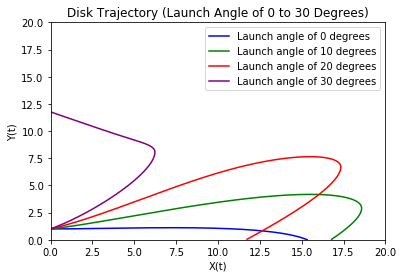

In [72]:
# Plot trajectory (x,y) graph

plt.plot(xplot[0], yplot[0], color = 'blue', label = 'Launch angle of 0 degrees')
plt.plot(xplot[2], yplot[2], color = 'green', label = 'Launch angle of 10 degrees')
plt.plot(xplot[4], yplot[4], color = 'red', label = 'Launch angle of 20 degrees')
plt.plot(xplot[6], yplot[6], color = 'purple', label = 'Launch angle of 30 degrees')

plt.ylabel('Y(t)')
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.xlabel('X(t)')
plt.title('Disk Trajectory (Launch Angle of 0 to 30 Degrees)')
plt.legend()
plt.show()

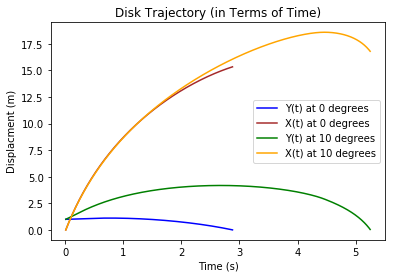

In [73]:
# Plot trajectory X and Y in terms of time
plt.plot(tplot[0], yplot[0], color = 'blue', label='Y(t) at 0 degrees')
plt.plot(tplot[0], xplot[0], color = 'brown', label='X(t) at 0 degrees')

plt.plot(tplot[2], yplot[2], color = 'green', label='Y(t) at 10 degrees')
plt.plot(tplot[2], xplot[2], color = 'orange', label='X(t) at 10 degrees')

# plt.plot(tplot[4], yplot[4], color = 'red', label='Y(t)')
# plt.plot(tplot[4], xplot[4], color = 'purple', label='X(t)')

# plt.plot(tplot[6], yplot[6], color = 'red', label='Y(t)')
# plt.plot(tplot[6], xplot[6], color = 'purple', label='X(t)')


plt.ylabel('Displacment (m)')
plt.xlabel('Time (s)')
plt.title('Disk Trajectory (in Terms of Time)')
plt.legend()
plt.show()